# Algoritmos de Clusterização Baseados em Densidade 

## Clusterização com DBSCAN

In [1]:
## Importando as bibliotecas e ferramentas necessárias

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', palette='pastel')

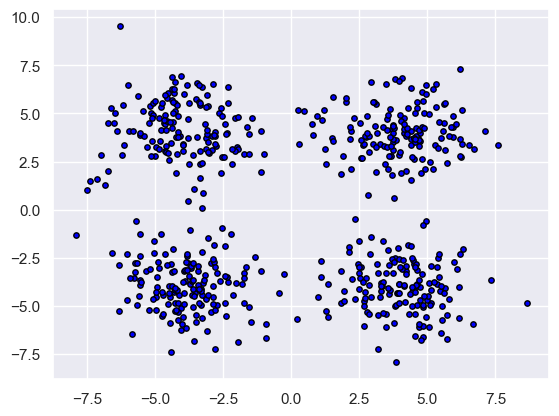

In [2]:
# Utilizando a ferramenta make_blobs para criar uma base
# de dados

centros = [(-4,-4), (-4,4), (4,-4), (4,4)]
clusters_std = 1.4

x, y = make_blobs(n_samples = 600,
                 cluster_std=clusters_std,
                 centers=centros,
                 n_features = 2,
                 random_state = 1)

plt.scatter(x[:,0], x[:,1], color='blue', edgecolors='black', s=15)


In [3]:
# Treinando o DBSCAN com os dados criados e verificando
# quantos clusters foram criados pelo DBSCAN.
# escolhendo o epsilon(distância) como 1 e o número minimo de pontos
# para ser caracterizado com vizinhança igual a 3 

db = DBSCAN(eps = 1, min_samples=3).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)

Número de Clusters: 4
Número de ruídos: 16


In [4]:
def db_plot(x, labels):
    df_db = pd.DataFrame(x)
    df_db['clusters'] = labels 
    
    sns.scatterplot(data=df_db,
                    x = 0, y = 1,
                    hue = 'clusters',
                    palette = 'deep')

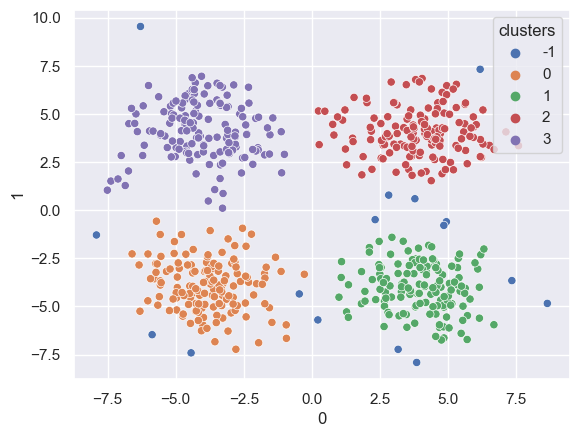

In [6]:
db_plot(x,labels)

Utilizando o DBSCAN para clusters com formatos variados

In [7]:
# Importando ferramenta para fazer clusters em formato
# de lua

from sklearn.datasets import make_moons

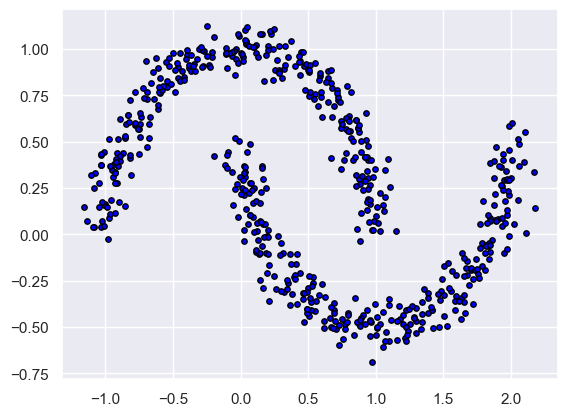

In [8]:
# Criando o dataset com dados em formato de lua

x, y = make_moons(n_samples=600,
                 noise = 0.07,
                 random_state = 1)

plt.scatter(x[:,0], x[:,1], color='blue', edgecolors='black', s=15)

In [9]:
# Fazendo a clusterização dos dados em formato de lua com
# o DBSCAN

db = DBSCAN(eps = .15, min_samples=4).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)

Número de Clusters: 2
Número de ruídos: 0


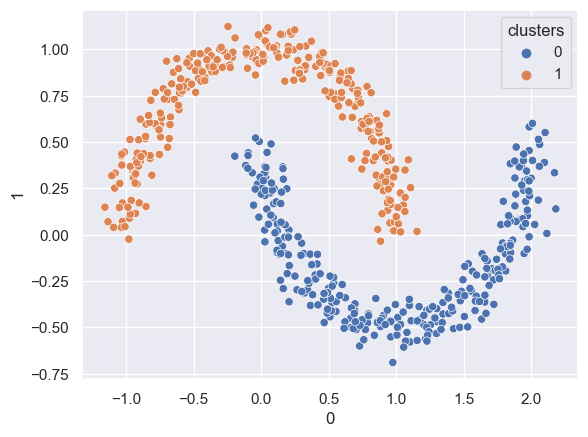

In [10]:
db_plot(x,labels)

## Clusterização com OPTICS

In [11]:
# Importando as ferramentas
from sklearn.cluster import OPTICS

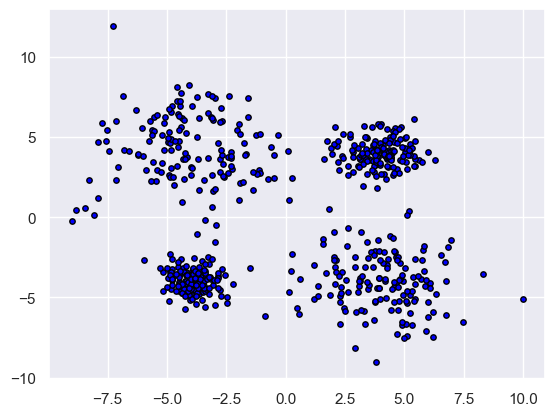

In [12]:
# Criando os dados com o make_blobs, mas variando o desvio
# padrão de cada um dos centros criados

centros = [(-4,-4), (-4,4), (4,-4), (4,4)]
clusters_std = [0.7, 2, 1.8, 0.9]

x, y = make_blobs(n_samples = 600,
                 cluster_std=clusters_std,
                 centers=centros,
                 n_features = 2,
                 random_state = 1)

plt.scatter(x[:,0], x[:,1], color='blue', edgecolors='black', s=15)


In [13]:
# Instanciando e treinando o algoritmo com os dados criados
# e verificando o número de clusters criados

clust = OPTICS(min_samples = 30, xi = 0.05, min_cluster_size = 0.05)

opt = clust.fit(x)
labels = opt.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)

Número de Clusters: 4
Número de ruídos: 9


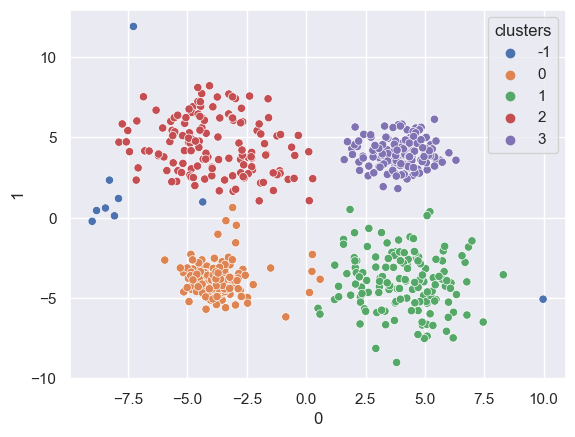

In [14]:
db_plot(x,labels)

Número de Clusters: 4
Número de ruídos: 32


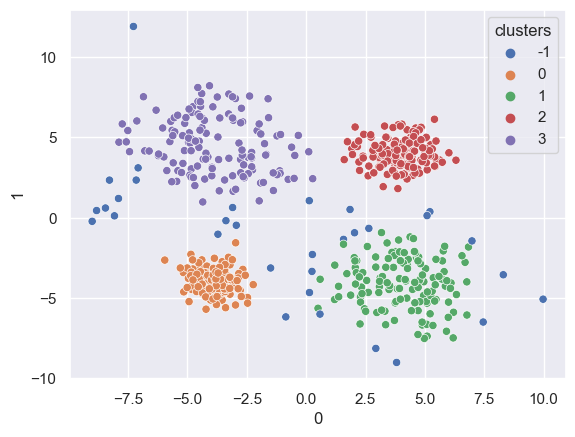

In [16]:
# Comparando com os clusters criados pelo DBSCAN

db = DBSCAN(eps = 1, min_samples=5).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)

db_plot(x,labels)

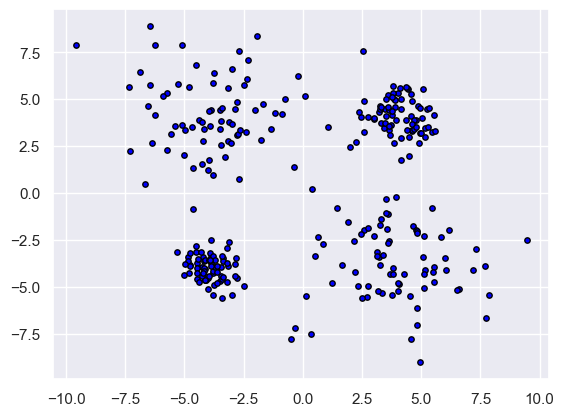

In [17]:
# Fazendo a comparação entre o DBSCAN e o OPTICS
# em datasets com menor densidade de dados

centros = [(-4,-4), (-4,4), (4,-4), (4,4)]
clusters_std = [0.7, 2, 1.8, 0.9]

x, y = make_blobs(n_samples = 300,
                 cluster_std=clusters_std,
                 centers=centros,
                 n_features = 2,
                 random_state = 1)

plt.scatter(x[:,0], x[:,1], color='blue', edgecolors='black', s=15)


Número de Clusters: 4
Número de ruídos: 26


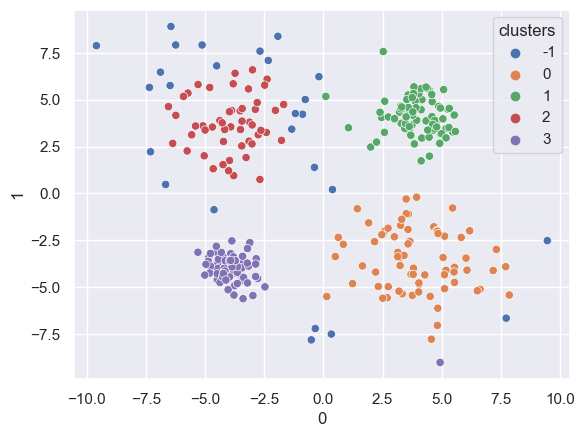

In [20]:
# Fazendo a Clusterização com o OPTICS
clust = OPTICS(min_samples = 30, xi = 0.05, min_cluster_size = 0.05)

opt = clust.fit(x)
labels = opt.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)
db_plot(x,labels)

Número de Clusters: 6
Número de ruídos: 39


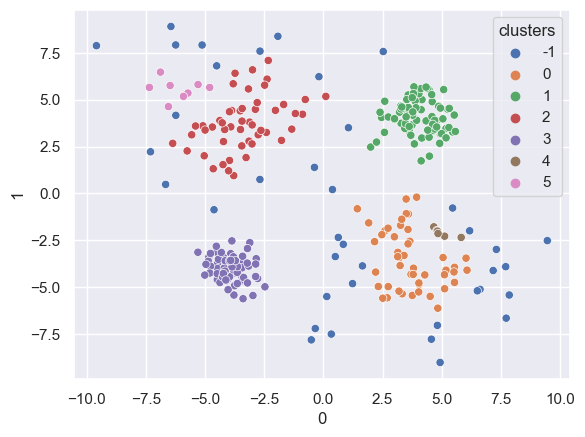

In [21]:
# Comparando com os clusters criados pelo DBSCAN

db = DBSCAN(eps = 1, min_samples=5).fit(x)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Número de Clusters: %d' %n_clusters_)
print('Número de ruídos: %d' %n_noise_)

db_plot(x,labels)

Onde os dados estão mais esparsos, o DBSCAN separou em clusters diferentes. Já o OPTICS conseguiu agrupar os dados esparsos em 4 clusters.